In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [122]:
#한글 폰트 안깨지게 설정
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

### 데이터 불러오기(2013-01~2023-09)

In [123]:
data = pd.read_csv('../Final project/data/data.csv', encoding='cp949')
data.head()

,Date,기준금리,주택건설인허가실적,전산업생산지수,주택담보대출금리,건설업_업황전망,건설업_매출전망,건설업_자금사전전망,소비자물가지수,생산자물가지수,...,회사채(3년),KOSPI_종가,KOSDAQ_종가,국채 거래량,회사채 거래량,GDP,주택전세가격지수,환율,주택 거래량,주택매매가격지수
0,13-Jan,2.75,23952,62.2697,4.55,56,68,62,92.728,104.96,...,3.20,1961.94,503.67,121500624,573916,0.9,82.7,1066.54,39477,70.462
1,13-Feb,2.75,45543,61.6258,4.51,52,76,77,93.038,105.68,...,3.06,2026.49,535.87,99040466,422222,0.9,82.9,1086.06,48592,70.421
2,13-Mar,2.75,75594,76.0634,4.46,58,68,72,92.952,105.26,...,2.95,2004.89,555.02,104760077,481596,0.9,83.2,1103.81,62934,70.389
3,13-Apr,2.75,106509,80.5564,4.40,61,71,74,92.823,104.93,...,2.91,1963.95,563.87,110564496,335381,1.2,83.6,1121.10,77082,70.391
4,13-May,2.50,142055,81.3058,4.33,58,74,70,92.823,104.57,...,2.96,2001.05,577.87,117919540,531677,1.2,83.8,1112.10,89599,70.381


In [124]:
from datetime import datetime
for i in range(len(data)):
    data['Date'][i] = datetime.strptime(data['Date'][i], '%y-%b')
data.head()

,Date,기준금리,주택건설인허가실적,전산업생산지수,주택담보대출금리,건설업_업황전망,건설업_매출전망,건설업_자금사전전망,소비자물가지수,생산자물가지수,...,회사채(3년),KOSPI_종가,KOSDAQ_종가,국채 거래량,회사채 거래량,GDP,주택전세가격지수,환율,주택 거래량,주택매매가격지수
0,2013-01-01 00:00:00,2.75,23952,62.2697,4.55,56,68,62,92.728,104.96,...,3.20,1961.94,503.67,121500624,573916,0.9,82.7,1066.54,39477,70.462
1,2013-02-01 00:00:00,2.75,45543,61.6258,4.51,52,76,77,93.038,105.68,...,3.06,2026.49,535.87,99040466,422222,0.9,82.9,1086.06,48592,70.421
2,2013-03-01 00:00:00,2.75,75594,76.0634,4.46,58,68,72,92.952,105.26,...,2.95,2004.89,555.02,104760077,481596,0.9,83.2,1103.81,62934,70.389
3,2013-04-01 00:00:00,2.75,106509,80.5564,4.40,61,71,74,92.823,104.93,...,2.91,1963.95,563.87,110564496,335381,1.2,83.6,1121.10,77082,70.391
4,2013-05-01 00:00:00,2.50,142055,81.3058,4.33,58,74,70,92.823,104.57,...,2.96,2001.05,577.87,117919540,531677,1.2,83.8,1112.10,89599,70.381


In [125]:
# 'Date' 열을 인덱스로 설정
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129 entries, 2013-01-01 to 2023-09-01
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   기준금리        129 non-null    float64
 1   주택건설인허가실적   129 non-null    int64  
 2   전산업생산지수     129 non-null    float64
 3   주택담보대출금리    129 non-null    float64
 4   건설업_업황전망    129 non-null    int64  
 5   건설업_매출전망    129 non-null    int64  
 6   건설업_자금사전전망  129 non-null    int64  
 7   소비자물가지수     129 non-null    float64
 8   생산자물가지수     129 non-null    float64
 9   미분양주택현황     129 non-null    int64  
 10  실업률         129 non-null    float64
 11  고용률         129 non-null    float64
 12  M2          129 non-null    int64  
 13  CD금리        129 non-null    float64
 14  국고채(3년)     129 non-null    float64
 15  국고채(10년)    129 non-null    float64
 16  국고채(30년)    129 non-null    float64
 17  회사채(3년)     129 non-null    float64
 18  KOSPI_종가    129 non-null    float64
 19  KOSDAQ_종가 

In [127]:
data.columns

Index(['기준금리', '주택건설인허가실적', '전산업생산지수', '주택담보대출금리', '건설업_업황전망', '건설업_매출전망',
       '건설업_자금사전전망', '소비자물가지수', '생산자물가지수', '미분양주택현황', '실업률', '고용률', 'M2',
       'CD금리', '국고채(3년)', '국고채(10년)', '국고채(30년)', '회사채(3년)', 'KOSPI_종가',
       'KOSDAQ_종가', '국채 거래량', '회사채 거래량', 'GDP', '주택전세가격지수', '환율', '주택 거래량',
       '주택매매가격지수'],
      dtype='object')

In [128]:
var_group = {'건설업 및 부동산 시장': ['주택건설인허가실적', '주택담보대출금리', '미분양주택현황', '건설업_업황전망', '건설업_매출전망', '건설업_자금사전전망'],
             '금융시장': ['CD금리', '국고채(3년)', '국고채(10년)', '국고채(30년)', '회사채(3년)', 'KOSPI_종가', 'KOSDAQ_종가', '국채 거래량', '회사채 거래량', '환율'],
             '경제 생산': ['전산업생산지수', '소비자물가지수', '생산자물가지수', '실업률', '고용률', 'M2', 'GDP']} # 주택전세가격지수는 pca 적용 X, 기준금리는 외생변수로 설정

<AxesSubplot:xlabel='Date'>

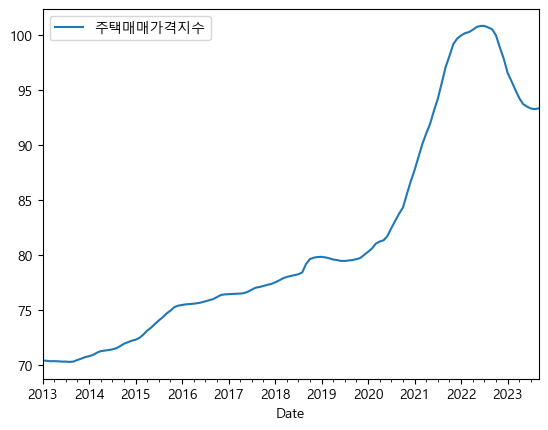

In [129]:
data[['주택매매가격지수']].plot() 

In [130]:
data.shape

(129, 27)

#### Granger Causality test

In [131]:
from statsmodels.tsa.stattools import grangercausalitytests
import warnings
warnings.filterwarnings('ignore')

def grangers_causation_matrix(data, variables, test='ssr_chi2test', maxlag=2, verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

cause_matrix = grangers_causation_matrix(data, data.columns) 
cause_matrix.iloc[-1, :] # p-value가 0.05보다 작으면 x -> y 인과관계가 있다. 회사채거래량을 제외하면 모두 주택매매가격지수와 인과관계가 있다.

기준금리_x          0.0000
주택건설인허가실적_x     0.0354
전산업생산지수_x       0.0400
주택담보대출금리_x      0.0000
건설업_업황전망_x      0.0001
건설업_매출전망_x      0.0024
건설업_자금사전전망_x    0.0000
소비자물가지수_x       0.0000
생산자물가지수_x       0.0000
미분양주택현황_x       0.0000
실업률_x           0.0003
고용률_x           0.0006
M2_x            0.0007
CD금리_x          0.0000
국고채(3년)_x       0.0000
국고채(10년)_x      0.0000
국고채(30년)_x      0.0000
회사채(3년)_x       0.0000
KOSPI_종가_x      0.0000
KOSDAQ_종가_x     0.0000
국채 거래량_x        0.0498
회사채 거래량_x       0.4759
GDP_x           0.0240
주택전세가격지수_x      0.0001
환율_x            0.0000
주택 거래량_x        0.0000
주택매매가격지수_x      1.0000
Name: 주택매매가격지수_y, dtype: float64

### Scaling

In [132]:
# train, test 분리
train = data[:int(len(data)*0.9)]
test = data[int(len(data)*0.9):]
y_train = train[['주택매매가격지수']]
y_test = test[['주택매매가격지수']]
X_train = train.drop(columns=['주택매매가격지수'], axis=1)
X_test = test.drop(columns=['주택매매가격지수'], axis=1)

In [133]:
from sklearn.preprocessing import MinMaxScaler
mm_X_train = MinMaxScaler()
X_train_sc = mm_X_train.fit_transform(X_train)
mm_y_train = MinMaxScaler()
y_train_sc = mm_y_train.fit_transform(y_train)

mm_X_test = MinMaxScaler()
X_test_sc = mm_X_test.fit_transform(X_test)
mm_y_test = MinMaxScaler()
y_test_sc = mm_y_test.fit_transform(y_test)

In [134]:
X_train_sc = pd.DataFrame(X_train_sc, index=X_train.index)
X_train_sc.columns = X_train.columns

X_test_sc = pd.DataFrame(X_test_sc, index=X_test.index)
X_test_sc.columns = X_test.columns

In [135]:
y_train_sc = pd.DataFrame(y_train_sc, index=y_train.index)
y_train_sc.columns = y_train.columns

y_test_sc = pd.DataFrame(y_test_sc, index=y_test.index)
y_test_sc.columns = y_test.columns

In [136]:
X = pd.concat([X_train_sc, X_test_sc])
X_pca = X.drop(columns=['주택전세가격지수'], axis=1) # 주택전세가격지수는 pca X

In [137]:
X_pca.columns

Index(['기준금리', '주택건설인허가실적', '전산업생산지수', '주택담보대출금리', '건설업_업황전망', '건설업_매출전망',
       '건설업_자금사전전망', '소비자물가지수', '생산자물가지수', '미분양주택현황', '실업률', '고용률', 'M2',
       'CD금리', '국고채(3년)', '국고채(10년)', '국고채(30년)', '회사채(3년)', 'KOSPI_종가',
       'KOSDAQ_종가', '국채 거래량', '회사채 거래량', 'GDP', '환율', '주택 거래량'],
      dtype='object')

#### 그룹 각각의 공통요인 추출

In [138]:
from sklearn.decomposition import PCA
import pandas as pd

# PCA 수행 함수
def apply_pca(variables, group_name, n_components=1):
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(variables)
    explained_variance_ratio = pca.explained_variance_ratio_
    return pd.DataFrame(data=principal_components, columns=[f'{group_name}_pc{i+1}' for i in range(n_components)]), explained_variance_ratio

# 각 변수 그룹에 대한 PCA 수행
pca_results = {}
explained_variance_ratios = {}

for group, variables in var_group.items():
    variables_data = X_pca[variables]
    pca_results[group], explained_variance_ratios[group] = apply_pca(variables_data, group)

# 결과 출력
for group, result_df in pca_results.items():
    print(f"PCA results for {group}:")
    print(result_df)
    print(f"Explained Variance Ratios for {group}: {explained_variance_ratios[group]}")
    print("\n")


PCA results for 건설업 및 부동산 시장:
     건설업 및 부동산 시장_pc1
0            1.085878
1            0.879531
2            0.862982
3            0.741871
4            0.753974
..                ...
124          0.420804
125          0.439774
126          0.156231
127          0.127561
128          0.289709

[129 rows x 1 columns]
Explained Variance Ratios for 건설업 및 부동산 시장: [0.4930965]


PCA results for 금융시장:
     금융시장_pc1
0    0.941824
1    0.857350
2    0.774286
3    0.710653
4    0.745903
..        ...
124 -0.753848
125 -0.317663
126 -0.273362
127  0.006999
128  0.285616

[129 rows x 1 columns]
Explained Variance Ratios for 금융시장: [0.54702857]


PCA results for 경제 생산:
     경제 생산_pc1
0    -0.620645
1    -0.612717
2    -0.535807
3    -0.473060
4    -0.448009
..         ...
124   0.066421
125   0.167312
126   0.304249
127   0.808743
128   1.162990

[129 rows x 1 columns]
Explained Variance Ratios for 경제 생산: [0.50686641]




In [139]:
# 각 PCA 결과를 하나의 DataFrame으로 합치기
X_pca = pd.concat(pca_results.values(), axis=1)
X_pca.index = data.index

X_train_pca = X_pca[:int(len(X_pca)*0.9)]
X_test_pca = X_pca[int(len(X_pca)*0.9):]

In [140]:
train_total = pd.concat([X_train_pca, X_train_sc[['주택전세가격지수']], y_train_sc], axis=1) # 주택전세가격지수 추가

In [141]:
train_total.head()

,건설업 및 부동산 시장_pc1,금융시장_pc1,경제 생산_pc1,주택전세가격지수,주택매매가격지수
Date,,,,,
2013-01-01,1.085878,0.941824,-0.620645,0.000000,0.004551
2013-02-01,0.879531,0.857350,-0.612717,0.009709,0.003208
2013-03-01,0.862982,0.774286,-0.535807,0.024272,0.002161
2013-04-01,0.741871,0.710653,-0.473060,0.043689,0.002226
2013-05-01,0.753974,0.745903,-0.448009,0.053398,0.001899


### DFM

In [143]:
"""
# Define the range of values for n_factors and factor_order
n_factors_range = [1, 2, 3, 4, 5]
factor_order_range = [2, 3, 4, 5]

best_aic = np.inf
best_params = None

endog = train_total

# Perform grid search
for n_factors in n_factors_range:
    for factor_order in factor_order_range:
        # Create and fit the DFM model
        dfm = DynamicFactor(endog=endog, k_factors=n_factors, factor_order=factor_order, enforce_stationarity=True)
        dfm_results = dfm.fit(maxiter=500)

        # Get AIC for the current model
        current_aic = dfm_results.aic

        # Update the best parameters if the current model has a lower AIC
        if current_aic < best_aic:
            best_aic = current_aic
            best_params = {'n_factors': n_factors, 'factor_order': factor_order}

# Print the best parameters
print(f"Best parameters: {best_params}")
# maxiter=500 일 때, n_factors=1, factor_order=2

"""

'\n# Define the range of values for n_factors and factor_order\nn_factors_range = [1, 2, 3, 4, 5]\nfactor_order_range = [2, 3, 4, 5]\n\nbest_aic = np.inf\nbest_params = None\n\nendog = train_total\n\n# Perform grid search\nfor n_factors in n_factors_range:\n    for factor_order in factor_order_range:\n        # Create and fit the DFM model\n        dfm = DynamicFactor(endog=endog, k_factors=n_factors, factor_order=factor_order, enforce_stationarity=True)\n        dfm_results = dfm.fit(maxiter=500)\n\n        # Get AIC for the current model\n        current_aic = dfm_results.aic\n\n        # Update the best parameters if the current model has a lower AIC\n        if current_aic < best_aic:\n            best_aic = current_aic\n            best_params = {\'n_factors\': n_factors, \'factor_order\': factor_order}\n\n# Print the best parameters\nprint(f"Best parameters: {best_params}")\n# maxiter=500 일 때, n_factors=1, factor_order=2\n\n'

In [144]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.dynamic_factor import DynamicFactor

endog = train_total
exog = X_train_sc[['기준금리']]

# DFM 모델 정의
n_factors = 1
dfm = DynamicFactor(endog=endog, exog = exog, k_factors=n_factors, factor_order=2, enforce_stationarity=True, error_order=2)

dfm_results = dfm.fit(maxiter=500) 


In [145]:
dfm_results.summary()

Dep. Variable:,"['건설업 및 부동산 시장_pc1', '금융시장_pc1', '경제 생산_pc1', '주택전세가격지수', '주택매매가격지수']",No. Observations:,116
Model:,"DynamicFactor(factors=1, order=2)",Log Likelihood,858.274
,+ 1 regressors,AIC,-1662.547
,+ AR(2) errors,BIC,-1588.201
Date:,"Mon, 04 Dec 2023",HQIC,-1632.367
Time:,19:23:32,,
Sample:,01-01-2013,,
,- 08-01-2022,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"5.25, 3.63, 0.20, 3.15, 0.04",Jarque-Bera (JB):,"2.77, 0.62, 0.89, 19.93, 144.67"
Prob(Q):,"0.02, 0.06, 0.65, 0.08, 0.85",Prob(JB):,"0.25, 0.73, 0.64, 0.00, 0.00"


    건설업 및 부동산 시장_pc1  금융시장_pc1  경제 생산_pc1  주택전세가격지수  주택매매가격지수
0          -2.767040 -1.856688   0.544117 -0.008753  0.021630
1          -2.682227 -1.799778   0.527439 -0.008485  0.020967
2          -2.648735 -1.777305   0.520853 -0.008379  0.020705
3          -2.614776 -1.754518   0.514175 -0.008271  0.020439
4          -2.581268 -1.732035   0.507586 -0.008165  0.020177
5          -2.548189 -1.709839   0.501082 -0.008061  0.019919
6          -2.515534 -1.687927   0.494660 -0.007958  0.019664
7          -2.483298 -1.666297   0.488321 -0.007856  0.019412
8          -2.451475 -1.644943   0.482064 -0.007755  0.019163
9          -2.420060 -1.623864   0.475886 -0.007656  0.018917
10         -2.389047 -1.603054   0.469788 -0.007557  0.018675


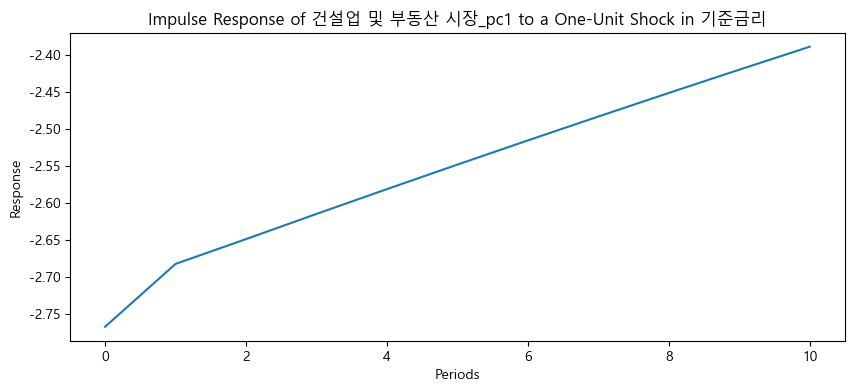

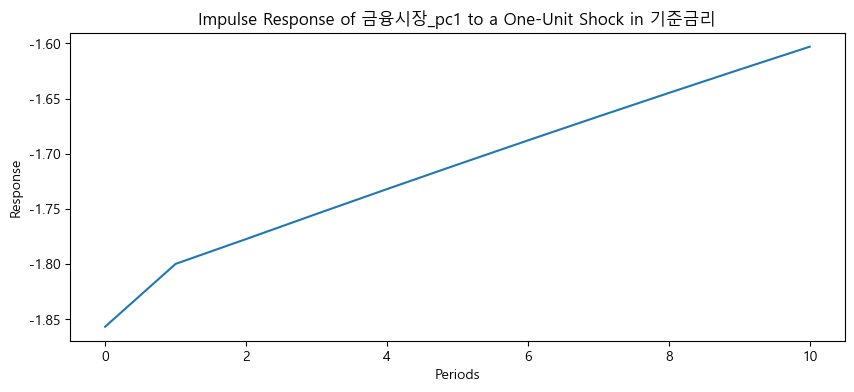

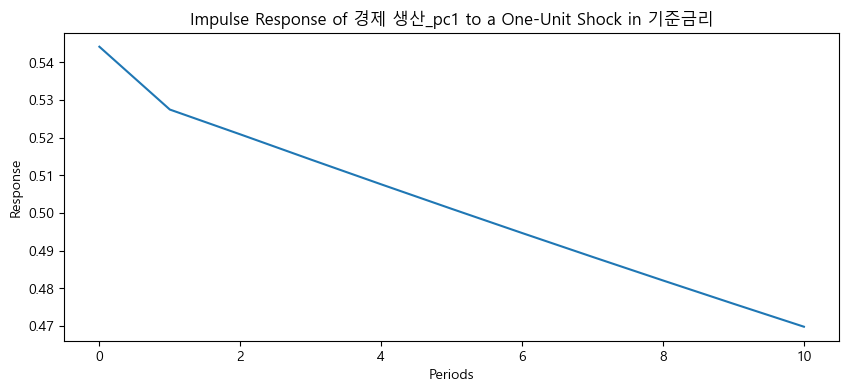

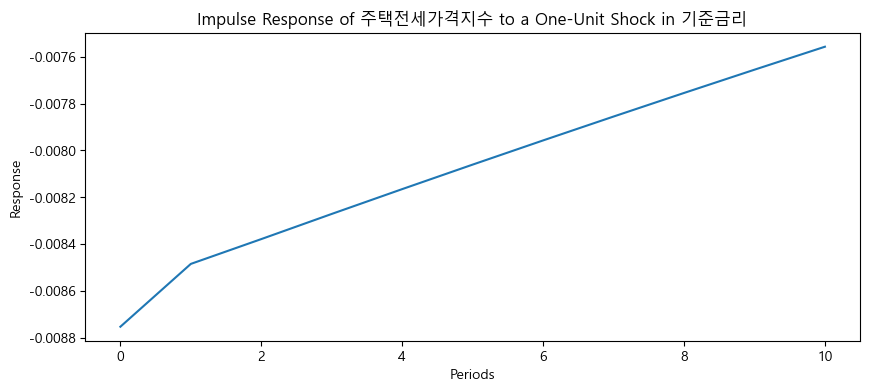

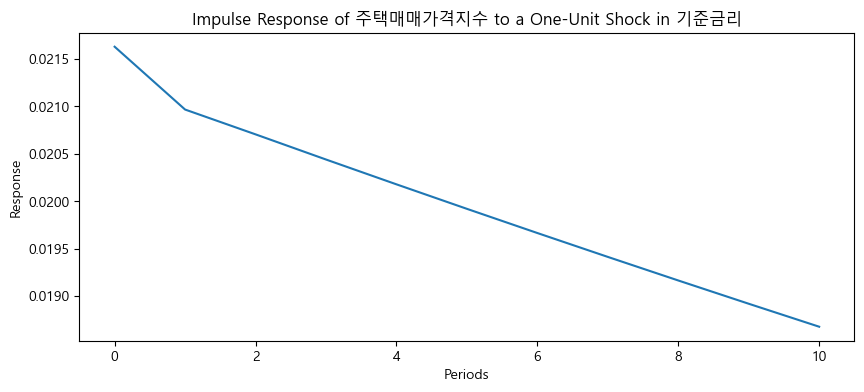

In [146]:
# Define the number of periods for which you want to compute the impulse responses
nperiods = 10

# Obtain the impulse responses
irf = dfm_results.impulse_responses(steps=nperiods)

# Print or visualize the impulse responses
print(irf)

# Plot each variable's impulse response
for i, col in enumerate(irf.columns):
    plt.figure(figsize=(10, 4))
    plt.plot(irf.index, irf[col])
    plt.title(f'Impulse Response of {col} to a One-Unit Shock in 기준금리')
    plt.xlabel('Periods')
    plt.ylabel('Response')
    plt.show()


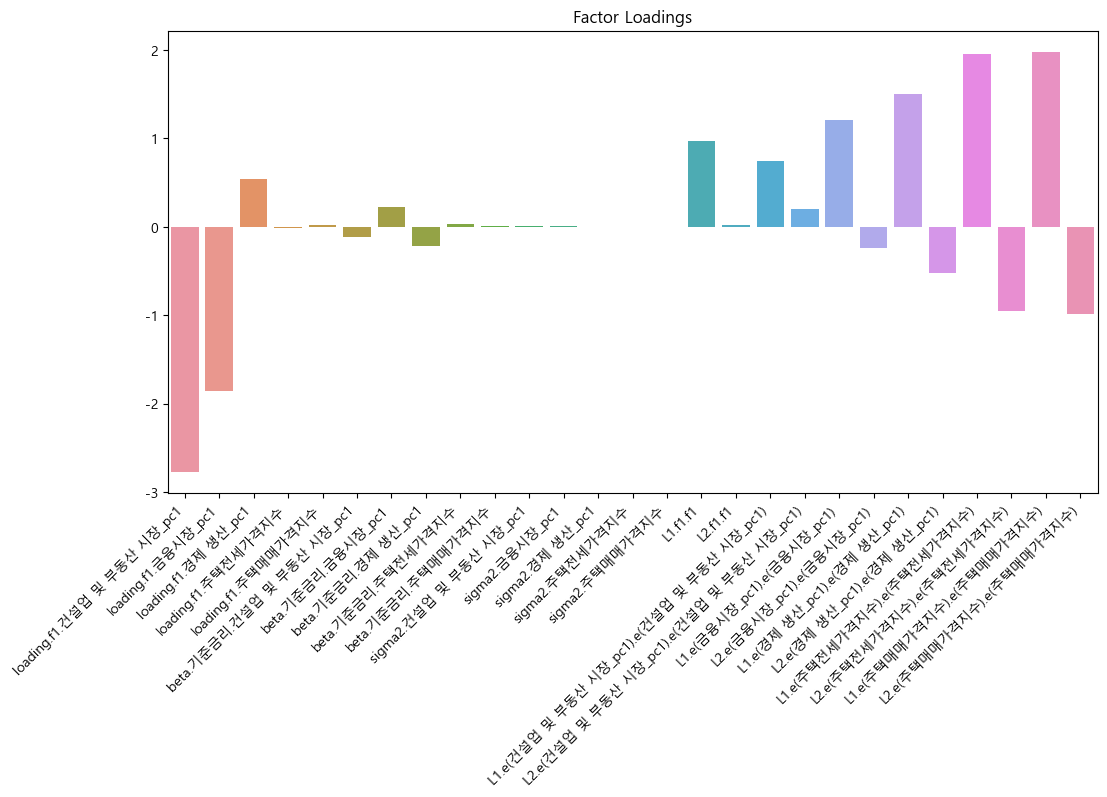

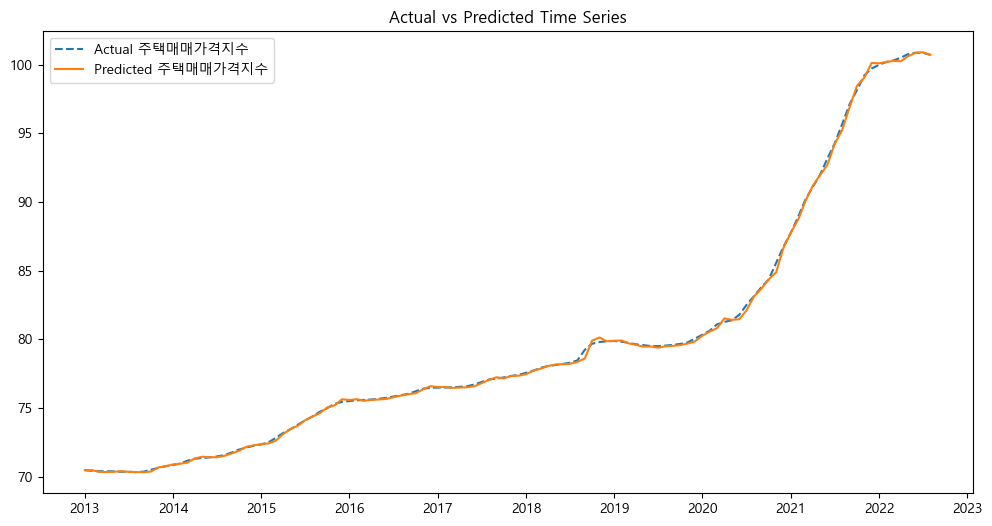

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract factor loadings from the results
factor_loadings = dfm_results.params

# Plot factor loadings
plt.figure(figsize=(12, 6))
sns.barplot(x=factor_loadings.index, y=factor_loadings.values)
plt.title('Factor Loadings')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot time series of dependent variables and predicted values
fig, ax = plt.subplots(figsize=(12, 6))
y_pred = mm_y_train.inverse_transform(dfm_results.predict()[['주택매매가격지수']])
y_pred = pd.DataFrame(y_pred, index = y_train.index)
y_pred.columns = y_train.columns
for i, variable in enumerate(['주택매매가격지수']):
    ax.plot(y_train.index, y_train[variable], label=f'Actual {variable}', linestyle='--')
    ax.plot(y_train.index, y_pred[variable], label=f'Predicted {variable}')

ax.set_title('Actual vs Predicted Time Series')
ax.legend()
plt.show()


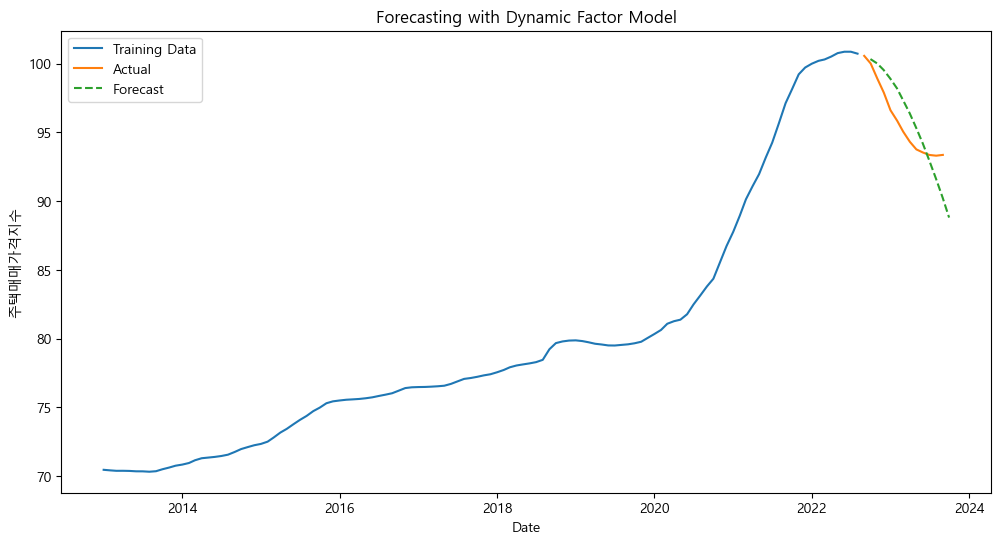

In [148]:
# Number of periods to forecast
forecast_periods = 13
exog_test = X_test_sc[['기준금리']]

# Get the prediction and forecast
dfm_forecast = dfm_results.get_forecast(exog = exog_test, steps=forecast_periods)

# Extract predicted values
y_pred_forecast = dfm_forecast.predicted_mean[['주택매매가격지수']]

# Inverse transform the predicted values to the original scale
y_pred_forecast_original = mm_y_train.inverse_transform(y_pred_forecast)

# Create a DataFrame for the forecast values
forecast_index = pd.date_range(start=y_train.index[-1], periods=forecast_periods + 1, freq='M')[1:]
y_pred_forecast_df = pd.DataFrame(y_pred_forecast_original, index=forecast_index, columns=['주택매매가격지수'])

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train['주택매매가격지수'], label='Training Data', linestyle='-')
plt.plot(y_test.index, y_test['주택매매가격지수'], label='Actual', linestyle = '-')
plt.plot(y_pred_forecast_df.index, y_pred_forecast_df['주택매매가격지수'], label='Forecast', linestyle='--')
plt.title('Forecasting with Dynamic Factor Model')
plt.xlabel('Date')
plt.ylabel('주택매매가격지수')
plt.legend()
plt.show()


In [149]:
from sklearn.metrics import mean_squared_error
train_rmse = mean_squared_error(y_pred['주택매매가격지수'], y_train['주택매매가격지수'])**0.5
print('Train RMSE:', train_rmse)
test_rmse = mean_squared_error(y_test, y_pred_forecast_df)**0.5
print('Test RMSE:', test_rmse)

Train RMSE: 0.15635349679577948
Test RMSE: 1.8124062731797779


In [150]:
y_pred_forecast_df

,주택매매가격지수
2022-09-30,100.332946
2022-10-31,100.018685
2022-11-30,99.544570
2022-12-31,98.914570
2023-01-31,98.207740
2023-02-28,97.354327
2023-03-31,96.396910
2023-04-30,95.341133
2023-05-31,94.192984
2023-06-30,92.958766
